In [2]:
# Installing Python 3.10.12
%pip install python==3.10.12

# Installing accelerate package for faster computation
%pip install accelerate

# Installing keras package for deep learning
%pip install keras

# Installing tensorflow package for deep learning
%pip install tensorflow

# Installing torch package for deep learning
%pip install torch

# Installing transformers package for deep learning
%pip install transformers

# Installing xgboost package for gradient boosting
%pip install xgboost

# Installing langchain package for natural language processing
%pip install langchain

# Installing pmdarima package for time series analysis
%pip install pmdarima

# Installing statsmodels package for time series analysis
%pip install statsmodels

# Installing pandas package for data manipulation
%pip install pandas

# Installing numpy package for numerical computation
%pip install numpy

# Installing matplotlib package for data visualization
%pip install matplotlib

# Installing scikit-learn package for machine learning
%pip install scikit-learn

ERROR: Could not find a version that satisfies the requirement python==3.10.12 (from versions: none)
ERROR: No matching distribution found for python==3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Importing the Quarterly data from OECD on Danish GDP 1990-2023
gdp = pd.read_csv(".//QGDP.csv", sep=';', header=None)
cons = pd.read_csv(".//Consumer.csv", sep=';')
indu = pd.read_csv(".//Industry.csv", sep=';')

In [5]:
#Selecting the relevant columns
gdp = gdp[[2, 3]]

## There is 13 questions the consumers have answered in the survey:
## - COF	Confidence Indicator (Q1 + Q2 + Q4 + Q9) / 4 (CONS.DK.TOT.COF.B.M)
## - 1	Financial situation over last 12 months (CONS.DK.TOT.1.B.M)
## - 2	Financial situation over next 12 months (CONS.DK.TOT.2.B.M)
## - 3	General economic situation over last 12 months (CONS.DK.TOT.3.B.M)
## - 4	General economic situation over next 12 months (CONS.DK.TOT.4.B.M)
## - 5	Price trends over last 12 months (CONS.DK.TOT.5.B.M)
## - 6	Price trends over next 12 months (CONS.DK.TOT.6.B.M)
## - 7	Unemployment expectations over next 12 months (CONS.DK.TOT.7.B.M)
## - 8	Major purchases at present (CONS.DK.TOT.8.B.M)
## - 9	Major purchases over next 12 months (CONS.DK.TOT.9.B.M)
## - 10	Savings at present (CONS.DK.TOT.10.B.M)
## - 11	Savings over next 12 months (CONS.DK.TOT.11.B.M)
## - 12	Statement on financial situation of household (CONS.DK.TOT.12.B.M)

##Selecting COF
cons = cons[['Time', 'CONS.DK.TOT.COF.B.M']]

##There is 8 relevant questions in the industry survey:
## - COF	Confidence Indicator (Q2 - Q4 + Q5) / 3 (INDU.DK.TOT.COF.B.M)
## - 1	Production trend observed in recent months (INDU.DK.TOT.1.B.M)
## - 2	Assessment of order-book levels (INDU.DK.TOT.2.B.M)
## - 3	Assessment of export order-book levels (INDU.DK.TOT.3.B.M)
## - 4	Assessment of stocks of finished products (INDU.DK.TOT.4.B.M)
## - 5	Production expectations for the months ahead (INDU.DK.TOT.5.B.M)
## - 6	Selling price expectations for the months ahead (INDU.DK.TOT.6.B.M)
## - 7	Employment expectations for the months ahead (INDU.DK.TOT.7.B.M)

## Selecting COF
indu = indu[['Time', 'INDU.DK.TOT.COF.B.M']]

In [6]:
#Renaming the columns
gdp = gdp.rename(columns={2: 'Time', 3: 'Value'})
cons = cons.rename(columns={'CONS.DK.TOT.COF.B.M': 'Value'})
indu = indu.rename(columns={'INDU.DK.TOT.COF.B.M': 'Value'})

#Converting the Time column to datetime
cons['Time'] = pd.to_datetime(cons['Time'], format='%d-%m-%Y')
indu['Time'] = pd.to_datetime(indu['Time'], format='%d-%m-%Y')
gdp['Time'] = pd.to_datetime(gdp['Time'])

# Converting the Value column to float64 in indu and cons
indu['Value'] = pd.to_numeric(indu['Value'], errors='coerce').astype('float64')

cons['Value'] = pd.to_numeric(cons['Value'], errors='coerce').astype('float64')


#Checking the data types
print("Data types in 'indu' dataframe:")
print(indu.dtypes)

print("\nData types in 'cons' dataframe:")
print(cons.dtypes)

print("\nData types in 'gdp' dataframe:")
print(gdp.dtypes)

Data types in 'indu' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object

Data types in 'cons' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object

Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object


In [7]:
# Resample indu and cons to quarterly frequency, using the mean value per quarter
indu_quarterly = indu.resample('Q', on='Time').mean()
cons_quarterly = cons.resample('Q', on='Time').mean()

# Adjust the datetime to the first day of the quarter
indu_quarterly['Time'] = indu_quarterly.index.to_period('Q').asfreq('Q-DEC', 'start').to_timestamp()
cons_quarterly['Time'] = cons_quarterly.index.to_period('Q').asfreq('Q-DEC', 'start').to_timestamp()

#Resetting the index of the new dataframes
indu_quarterly.reset_index(drop=True, inplace=True)
cons_quarterly.reset_index(drop=True, inplace=True)

#Checking the data types
print(indu_quarterly.dtypes)
print(cons_quarterly.dtypes)

Value           float64
Time     datetime64[ns]
dtype: object
Value           float64
Time     datetime64[ns]
dtype: object


In [8]:
#Filtering the data to only include the years 1990-2023, as this is the limitation in gdp dataset
indu_quarterly = indu_quarterly[(indu_quarterly['Time'] >= '1990-01-01') & (indu_quarterly['Time'] < '2024-01-01')]
cons_quarterly = cons_quarterly[(cons_quarterly['Time'] >= '1990-01-01') & (cons_quarterly['Time'] < '2024-01-01')]

In [9]:
#Cleanup
cons = cons_quarterly
indu = indu_quarterly

cons.reset_index(drop=True, inplace=True)
indu.reset_index(drop=True, inplace=True)

del cons_quarterly, indu_quarterly

In [10]:
#Using the period 2014-2016 for training and 2016-2020 for testing
indu_train = indu[(indu['Time'] >= '2014-01-01') & (indu['Time'] < '2016-01-01')]
cons_train = cons[(cons['Time'] >= '2014-01-01') & (cons['Time'] < '2016-01-01')]
gdp_train = gdp[(gdp['Time'] >= '2014-01-01') & (gdp['Time'] < '2016-01-01')]

indu_test = indu[(indu['Time'] >= '2016-01-01') & (indu['Time'] < '2020-01-01')]
cons_test = cons[(cons['Time'] >= '2016-01-01') & (cons['Time'] < '2020-01-01')]
gdp_test = gdp[(gdp['Time'] >= '2016-01-01') & (gdp['Time'] < '2020-01-01')]

In [11]:
#Combine the training data by matching the time
train = pd.merge(indu_train, cons_train, on='Time', how='inner')
train = pd.merge(train, gdp_train, on='Time', how='inner')


#Combine the testing data by matching the time
test = pd.merge(indu_test, cons_test, on='Time', how='inner')
test = pd.merge(test, gdp_test, on='Time', how='inner')

#Renaming the columns
train.columns = ['indu','Time', 'cons', 'gdp']
test.columns = ['indu','Time', 'cons', 'gdp']


In [12]:
# This is used to combine and "stuff" multiple documents into a single prompt for an LLM
from langchain.chains.combine_documents.stuff import StuffDocumentsChain

# This is used to create a chain with a language model
from langchain.chains.llm import LLMChain

# This is used to create and manage prompts for language models
from langchain.prompts import PromptTemplate

# This is used to load a pre-defined summarization chain for summarizing text
from langchain.chains.summarize import load_summarize_chain

# This is used to split text into smaller chunks or characters
from langchain.text_splitter import CharacterTextSplitter


In [13]:
import torch
#from langchain import HuggingFacePipeline
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig, pipeline
import os
from google.colab import userdata

# Set the Hugging Face API token as an environment variable
os.environ["HF_TOKEN"] = userdata.get("huggingface_key")

#Set the device to use
device = torch.device("cuda")


MODEL_NAME = "mistralai/Mistral-7B-Instruct-v0.2"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME, torchscript=True, torch_dtype=torch.float16, trust_remote_code=True, device_map="auto"
)

# Create a configuration for text generation based on the specified model name
generation_config = GenerationConfig.from_pretrained(MODEL_NAME)

# Set the maximum number of new tokens in the generated text to 1024.
# This limits the length of the generated output to 2048 tokens.
generation_config.max_new_tokens = 2048

# Set the temperature for text generation. Lower values (e.g., 0.0001) make output more deterministic, following likely predictions.
# Higher values make the output more random.
generation_config.temperature = 0.01

# Set the top-p sampling value. A value of 0.95 means focusing on the most likely words that make up 95% of the probability distribution.
generation_config.top_p = 0.95

# Enable text sampling. When set to True, the model randomly selects words based on their probabilities, introducing randomness.
generation_config.do_sample = True

# Set the repetition penalty. A value of 1.15 discourages the model from repeating the same words or phrases too frequently in the output.
generation_config.repetition_penalty = 1.15


# Create a text generation pipeline using the initialized model, tokenizer, and generation configuration
text_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    generation_config=generation_config
)


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [38]:
import json

pre_prompt = ("You are a time series forecasting model designed to predict the Danish GDP based solely on historical consumer sentiment, industry sentiment, and GDP data. "
              "Your task is to forecast the GDP value for the given future quarters from 2016 to 2019, using only the provided consumer sentiment and industry sentiment scores for those future quarters. "
              "Historical data to analyse the relationship between the variables is provided here:")

data = []

for i, row in train.iterrows():
    date_str = row['Time'].date().isoformat()
    data.append({
        "date": date_str,
        "consumer_sentiment": row['cons'],
        "industry_sentiment": row['indu'],
        "gdp": row['gdp']
    })

pre_prompt += json.dumps(data, indent=2)


In [42]:
mid_prompt = ("\nFuture periods which needs to be forecasted are as follows: \n")

data = []

for i, row in test.iterrows():
    date_str = row['Time'].date().isoformat()
    data.append({
        "quarter_date": date_str,
        "consumer_sentiment": row['cons'],
        "industry_sentiment": row['indu'],
        "gdp": ""
    })

prompt = ("\n\nBased solely on the patterns you identify in the above historical data, you must return the list of future quarters with the 'gdp' attribute filled in with your predicted numerical GDP value, "
"calculated using only the given consumer sentiment and industry sentiment scores for each quarter. You are not allowed to any additional text or explanation. Your output should only return the JSON formatted list with filled gdp predictions")

prompt = mid_prompt + json.dumps(data, indent=2) + prompt

In [43]:
prompt_template_ta = pre_prompt + prompt

print(prompt_template_ta)

You are a time series forecasting model designed to predict the Danish GDP based solely on historical consumer sentiment, industry sentiment, and GDP data. Your task is to forecast the GDP value for the given future quarters from 2016 to 2019, using only the provided consumer sentiment and industry sentiment scores for those future quarters. Historical data to analyse the relationship between the variables is provided here:[
  {
    "date": "2014-01-01",
    "consumer_sentiment": 5.233333333333333,
    "industry_sentiment": 1.6666666666666667,
    "gdp": 479.6
  },
  {
    "date": "2014-04-01",
    "consumer_sentiment": 6.833333333333333,
    "industry_sentiment": -6.333333333333333,
    "gdp": 495.2
  },
  {
    "date": "2014-07-01",
    "consumer_sentiment": 9.033333333333333,
    "industry_sentiment": -9.666666666666666,
    "gdp": 493.7
  },
  {
    "date": "2014-10-01",
    "consumer_sentiment": 7.066666666666666,
    "industry_sentiment": -18.666666666666668,
    "gdp": 512.7
  }

In [44]:
#Generating the text
res = text_pipeline(prompt_template_ta)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [46]:
prompt_response = res[0]["generated_text"]
prompt_response_ta = prompt_response.replace(prompt_template_ta, '')
prompt_response_ta

'.\n```json\n[\n  {\n    "quarter_date": "2016-01-01",\n    "consumer_sentiment": 3.033333333333333,\n    "industry_sentiment": -5.333333333333333,\n    "gdp": 503.2\n  },\n  {\n    "quarter_date": "2016-04-01",\n    "consumer_sentiment": 4.666666666666667,\n    "industry_sentiment": -4.666666666666667,\n    "gdp": 508.5\n  },\n  {\n    "quarter_date": "2016-07-01",\n    "consumer_sentiment": 3.266666666666667,\n    "industry_sentiment": -6.0,\n    "gdp": 502.8\n  },\n  {\n    "quarter_date": "2016-10-01",\n    "consumer_sentiment": 0.6333333333333333,\n    "industry_sentiment": -8.333333333333334,\n    "gdp": 493.1\n  },\n  {\n    "quarter_date": "2017-01-01",\n    "consumer_sentiment": 5.166666666666667,\n    "industry_sentiment": -1.3333333333333333,\n    "gdp": 508.9\n  },\n  {\n    "quarter_date": "2017-04-01",\n    "consumer_sentiment": 6.266666666666667,\n    "industry_sentiment": 0.0,\n    "gdp": 514.5\n  },\n  {\n    "quarter_date": "2017-07-01",\n    "consumer_sentiment": 7.2

In [47]:
#Use regular expression to extract JSON
import re
pattern = r'\[(.*?)\]'
matches = re.search(pattern, prompt_response_ta, re.DOTALL)

if matches:
    gdp_json = matches.group(0)
    print(gdp_json)
else:
    print("JSON not found in the input string.")

[
  {
    "quarter_date": "2016-01-01",
    "consumer_sentiment": 3.033333333333333,
    "industry_sentiment": -5.333333333333333,
    "gdp": 503.2
  },
  {
    "quarter_date": "2016-04-01",
    "consumer_sentiment": 4.666666666666667,
    "industry_sentiment": -4.666666666666667,
    "gdp": 508.5
  },
  {
    "quarter_date": "2016-07-01",
    "consumer_sentiment": 3.266666666666667,
    "industry_sentiment": -6.0,
    "gdp": 502.8
  },
  {
    "quarter_date": "2016-10-01",
    "consumer_sentiment": 0.6333333333333333,
    "industry_sentiment": -8.333333333333334,
    "gdp": 493.1
  },
  {
    "quarter_date": "2017-01-01",
    "consumer_sentiment": 5.166666666666667,
    "industry_sentiment": -1.3333333333333333,
    "gdp": 508.9
  },
  {
    "quarter_date": "2017-04-01",
    "consumer_sentiment": 6.266666666666667,
    "industry_sentiment": 0.0,
    "gdp": 514.5
  },
  {
    "quarter_date": "2017-07-01",
    "consumer_sentiment": 7.266666666666666,
    "industry_sentiment": 2.33333333

In [48]:
#Convert the JSON string to a dictionary
import json
gdp_dict = json.loads(gdp_json)

#Convert the dictionary to a DataFrame
gdp_pred = pd.DataFrame(gdp_dict)
gdp_pred

,quarter_date,consumer_sentiment,industry_sentiment,gdp
0,2016-01-01,3.033333,-5.333333,503.2
1,2016-04-01,4.666667,-4.666667,508.5
2,2016-07-01,3.266667,-6.000000,502.8
3,2016-10-01,0.633333,-8.333333,493.1
4,2017-01-01,5.166667,-1.333333,508.9
5,2017-04-01,6.266667,0.000000,514.5
6,2017-07-01,7.266667,2.333333,521.2
7,2017-10-01,6.933333,0.666667,526.8
8,2018-01-01,7.600000,-1.000000,531.3
9,2018-04-01,7.066667,3.666667,536.5


In [49]:
#Adding the predictions to the test data
test['gdp_pred'] = gdp_pred['gdp']

print(test)

         indu       Time      cons    gdp  gdp_pred
0   -5.333333 2016-01-01  3.033333  504.8     503.2
1   -4.666667 2016-04-01  4.666667  534.1     508.5
2   -6.000000 2016-07-01  3.266667  521.5     502.8
3   -8.333333 2016-10-01  0.633333  547.4     493.1
4   -1.333333 2017-01-01  5.166667  530.6     508.9
5    0.000000 2017-04-01  6.266667  558.4     514.5
6    2.333333 2017-07-01  7.266667  541.1     521.2
7    0.666667 2017-10-01  6.933333  562.9     526.8
8   -1.000000 2018-01-01  7.600000  538.6     531.3
9    3.666667 2018-04-01  7.066667  569.3     536.5
10   2.333333 2018-07-01  6.866667  560.2     539.9
11  -5.000000 2018-10-01  3.500000  585.2     525.5
12  -4.666667 2019-01-01  3.466667  555.8     521.1
13  -3.333333 2019-04-01  5.866667  583.2     528.3
14  -7.000000 2019-07-01  3.866667  574.4     513.0
15 -10.000000 2019-10-01  2.800000  597.6     500.0


In [50]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error

#Comparing the forecasted values with the actual values trough RMSE and MAPE
# Calculate the RMSE
rmse_value = rmse(test['gdp'], test['gdp_pred'])
# Calculate the MAPE
mape_value = mean_absolute_percentage_error(test['gdp'], test['gdp_pred'])*100 #Multiplying by 100 to get the percentage

# Print the RMSE
print("The RMSE is", rmse_value)
# Print the MAPE
print("The MAPE is", mape_value)

The RMSE is 43.783951112251174
The MAPE is 6.517392635146887


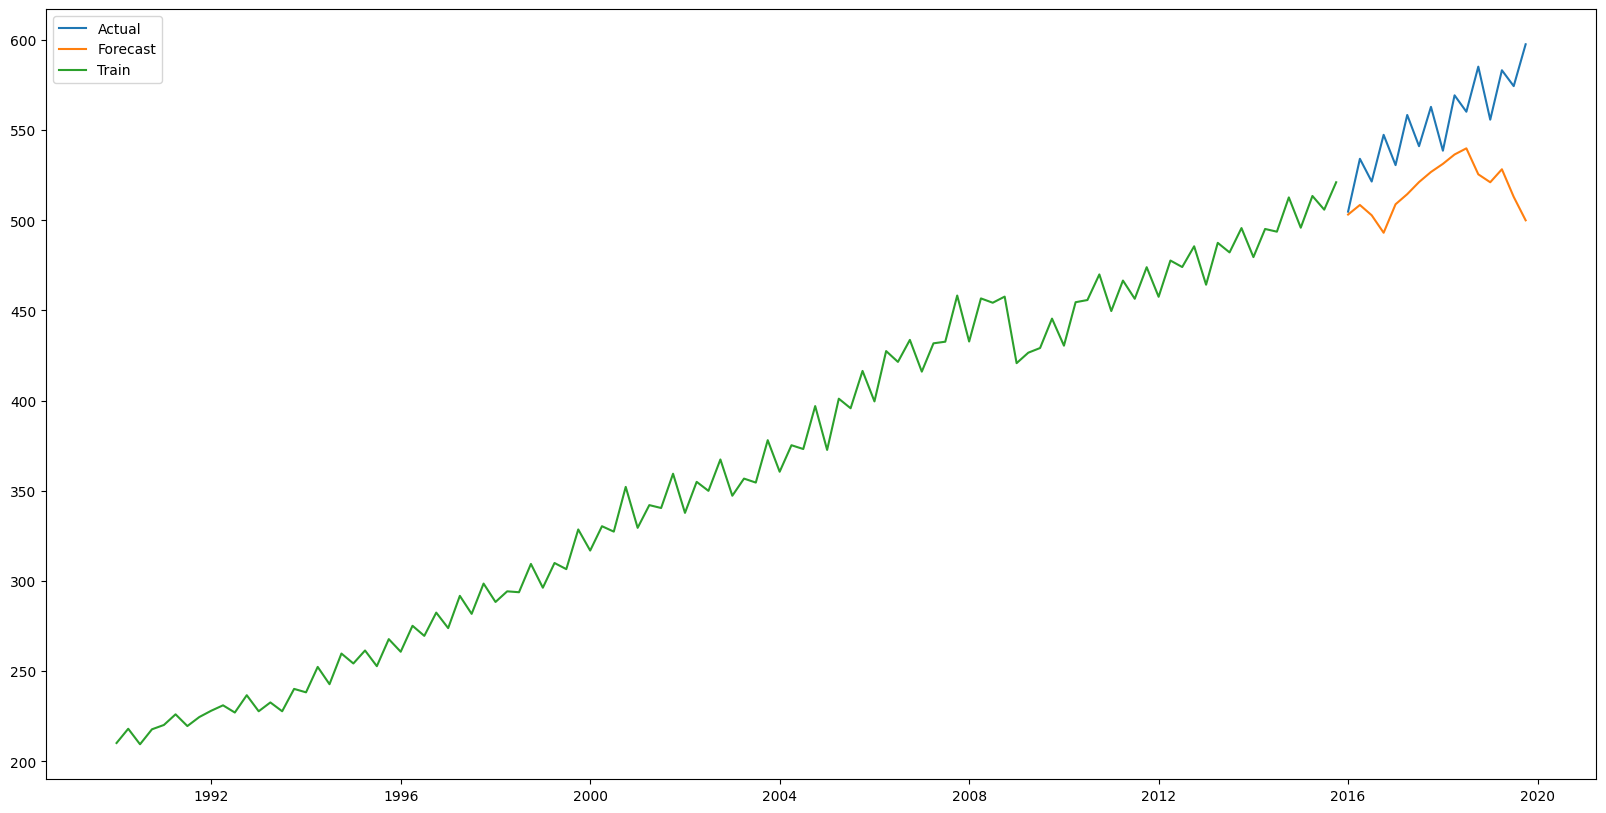

In [51]:
#Converting all relevant columns to numpy arrays
actual = test['gdp'].to_numpy()
forecast = test['gdp_pred'].to_numpy()
test_time = test['Time'].to_numpy()

gdp_train1 = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2016-01-01')]
historical = gdp_train1['Value'].to_numpy()
historical_time = gdp_train1['Time'].to_numpy()

#Plotting the actual values against the forecasted values
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(test_time, actual, label='Actual')
plt.plot(test_time, forecast, label='Forecast')
plt.plot(historical_time, historical, label='Train')
plt.legend()

plt.show()